In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing,Standardizing
from sklearn.preprocessing import StandardScaler

#For Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Models
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

#Metrics
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

# Train Data

In [2]:
df=pd.read_csv('train.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

# EDA

In [18]:
df.shape

(1168, 81)

We have 1168 rows and 81 columns in the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

We see null values in some of the features and that data types are of object ant int. SalePrice is our Target variable.

In [4]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1168.000000  1168.000000    954.00000    1168.000000  1168.000000   
mean    724.136130    56.767979     70.98847   10484.749144     6.104452   
std     416.159877    41.940650     24.82875    8957.442311     1.390153   
min       1.000000    20.000000     21.00000    1300.000000     1.000000   
25%     360.500000    20.000000     60.00000    7621.500000     5.000000   
50%     714.500000    50.000000     70.00000    9522.500000     6.000000   
75%    1079.500000    70.000000     80.00000   11515.500000     7.000000   
max    1460.000000   190.000000    313.00000  164660.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1168.000000  1168.000000   1168.000000  1161.000000  1168.000000  ...   
mean      5.595890  1970.930651   1984.758562   102.310078   444.726027  ...   
std       1.124343    30.145255     20.785185   182.595606   462.664785  ...   
min       1.000000  1875.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1966.000000     0.000000     0.000000  ...   
50%       5.000000  1972.000000   1993.000000     0.000000   385.500000  ...   
75%       6.000000  2000.000000   2004.000000   160.000000   714.500000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     96.206336    46.559932      23.015411     3.639555    15.051370   
std     126.158988    66.381023      63.191089    29.088867    55.080816   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    24.000000       0.000000     0.000000     0.000000   
75%     171.000000    70.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1168.000000   1168.000000  1168.000000  1168.000000    1168.000000  
mean      3.448630     47.315068     6.344178  2007.804795  181477.005993  
std      44.896939    543.264432     2.686352     1.329738   79105.586863  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  130375.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163995.000000  
75%       0.000000      0.000000     8.000000  2009.000000  215000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

Apart from the missing values, we can see some of the features have outliers present in it along with the skewness.

<AxesSubplot:>

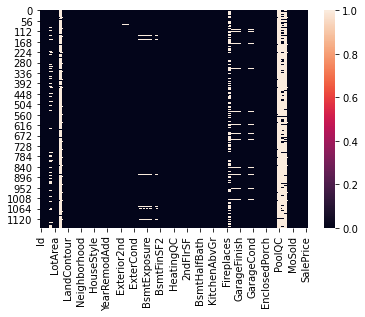

In [6]:
sns.heatmap(df.isna())

In [3]:
pd.set_option("display.max_rows",None)

To display all the rows

In [3]:
df.rename(columns={'2ndFlrSF':'SecondFlrSF'},inplace=True)

In [4]:
df.drop(columns=['Id','Alley','Utilities','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

Dropping Alley, PoolQC, Fence and MiscFeature since it has more than 80% missing values.
Dropping Utilities since it has just one unique value.
Dropping Id since there are different values for each row.

In [5]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mean())
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1']=df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

We have filled the null values by using mean and mode method.

<AxesSubplot:>

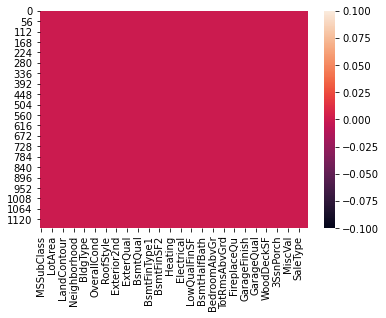

In [8]:
sns.heatmap(df.isna())

As we can see in the heatmap, we don't have any null values present in our dataset.

In [8]:
y=df['SalePrice']
X=df.drop(columns=['SalePrice'])

Separating the independent and dependent variables to visualize further with respect to the target variable.

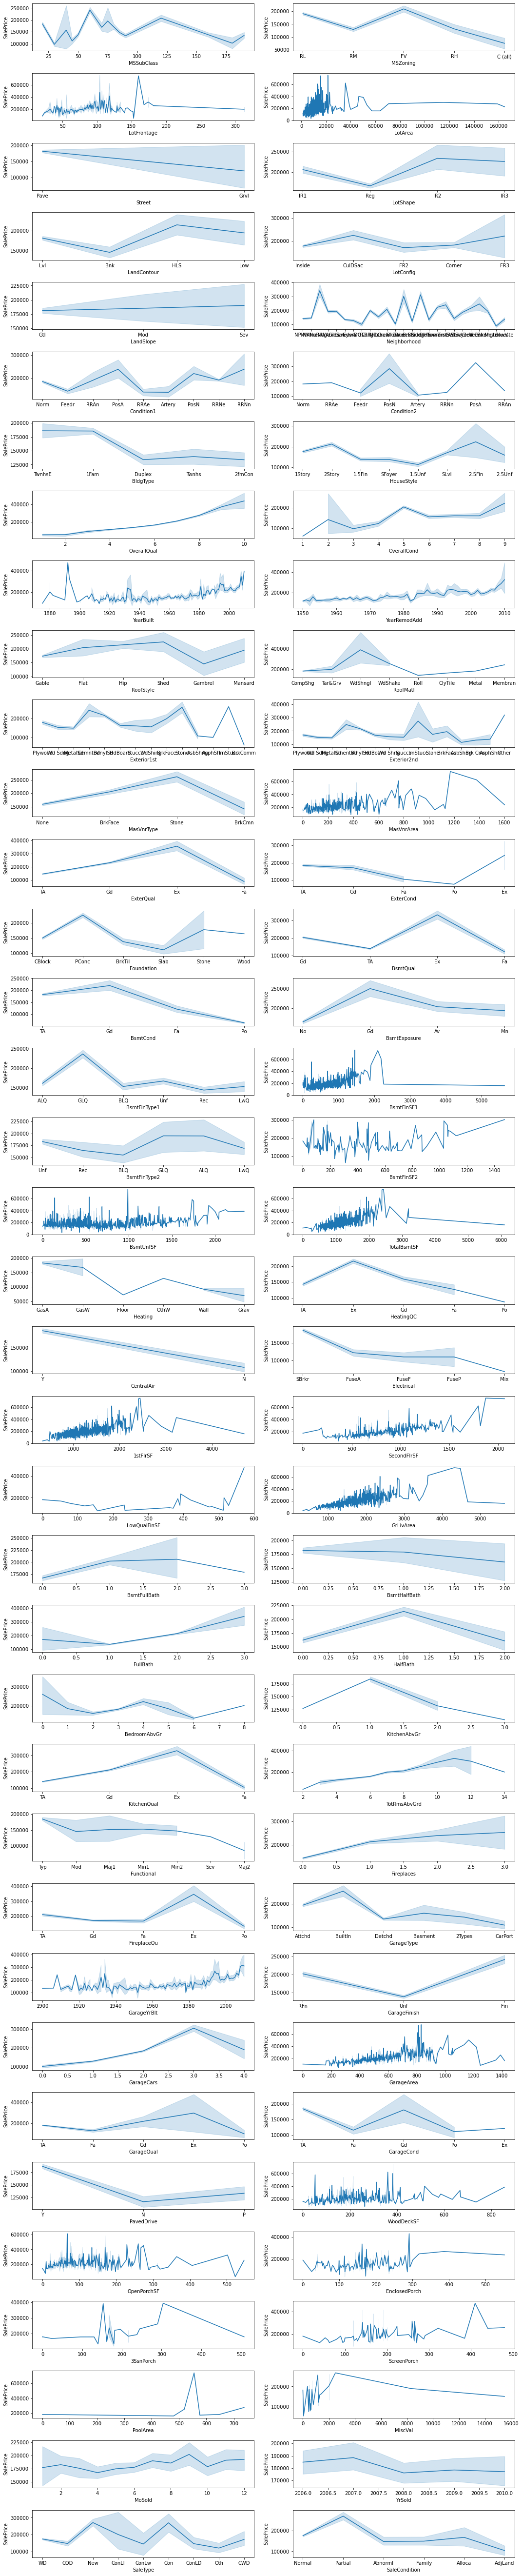

In [12]:
plt.figure(figsize=(15,75),facecolor='white')
plotnumber=1

for column in X:
    if plotnumber<=76:
        ax=plt.subplot(38,2,plotnumber)
        sns.lineplot(X[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('SalePrice',fontsize=10)
    
    plotnumber+=1
plt.tight_layout()

#### From the above data visualization:

1. Sale Price is highest for Floating Residential Village and lowest for Commercial zone.
2. Sale Price is highest for Paved Street and lowest for Gravel Street.
3. Sale Price is highest for Moderately Irregular shaped property and lowest for Regular shaped property.
4. Sale Price increases with Total square feet of basement area but it falls drastically after 2500 square feet area.
5. Sale Price is highest on the Hillside flatness whereas lowest in the banked flatness.
6. Sale Price doesn't have much of an impact on Type of Land Slope or Neighborhood.
7. Better the quality, higher the sale price.
8. Although not monotonic, but there's an increase in sale price with better overall condition.
9. The sale prices were highest during the late 19th century but fell sharply during the early 20th century and since then the prices have been increasing year by year.
10. Also the Sale price increases with every remodelling done.
11. Sale price is highest for houses with Shed roofs and lowest for houses with Gambrel roofs.
12. Sale price is highest for roofs made with Wood Shingles material and lowest for roofs made with Roll material.
13. Houses of Stone Masonry Veneer type have the highest sale price while houses of Brick common masonry veneer type have the lowest sale price.
14. Sale price increases with increase in Masonry veneer area but gradually declines after 1200 square feet area.
15. Sale price ih highest for Poured Concrete foundation and lowest for Slab foundation.
16. Sale Price increases with increase in Total square feet of Basement area but gradually declines from 2500 sq. ft. area.
17. Sale prices are highest for houses with central air conditioning.
18. Prices increase with increase in first floor square feet but there is a gradual decline after 2500 sq. ft.
19. Prices increase with increase in Second floor sq. ft alothough not monotonic.
20. Prices increase with increase in Ground living area sq. ft although there is a sharp decline after 4500 sq. ft. area.
21. Prices decline with better quality of basement half bathrooms.

In [33]:
df_numericals=df[['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','SecondFlrSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','MoSold','YrSold']]

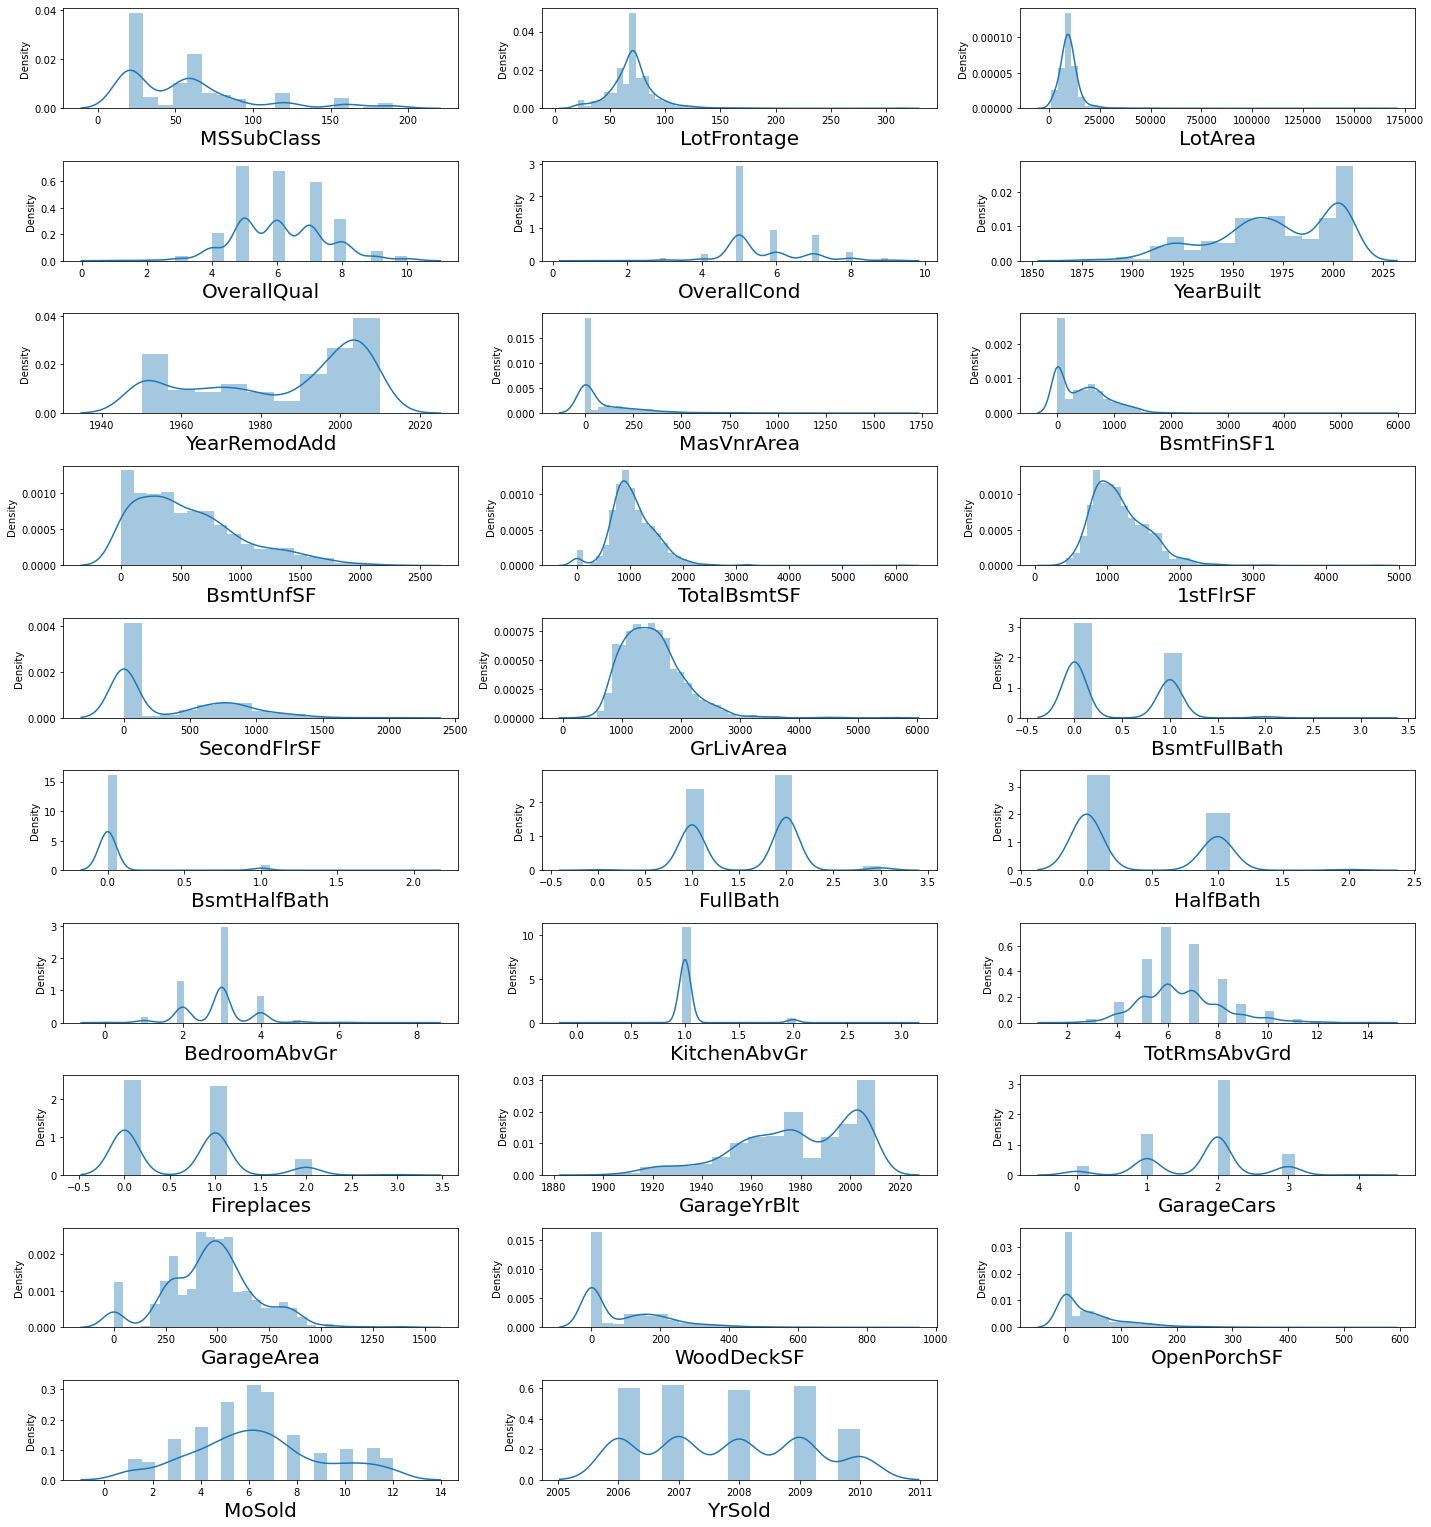

In [15]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df_numericals:
    if plotnumber<=36:
        ax=plt.subplot(12,3,plotnumber)
        sns.distplot(df_numericals[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.tight_layout()

Most of the variables are not normally distributed.

<AxesSubplot:xlabel='YrSold', ylabel='count'>

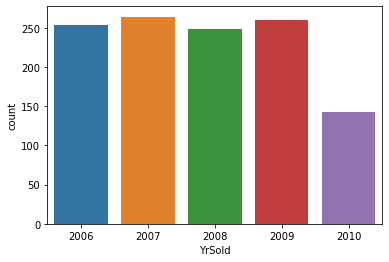

In [28]:
sns.countplot(df.YrSold)

We had more house sales in 2009 and least in 2010.

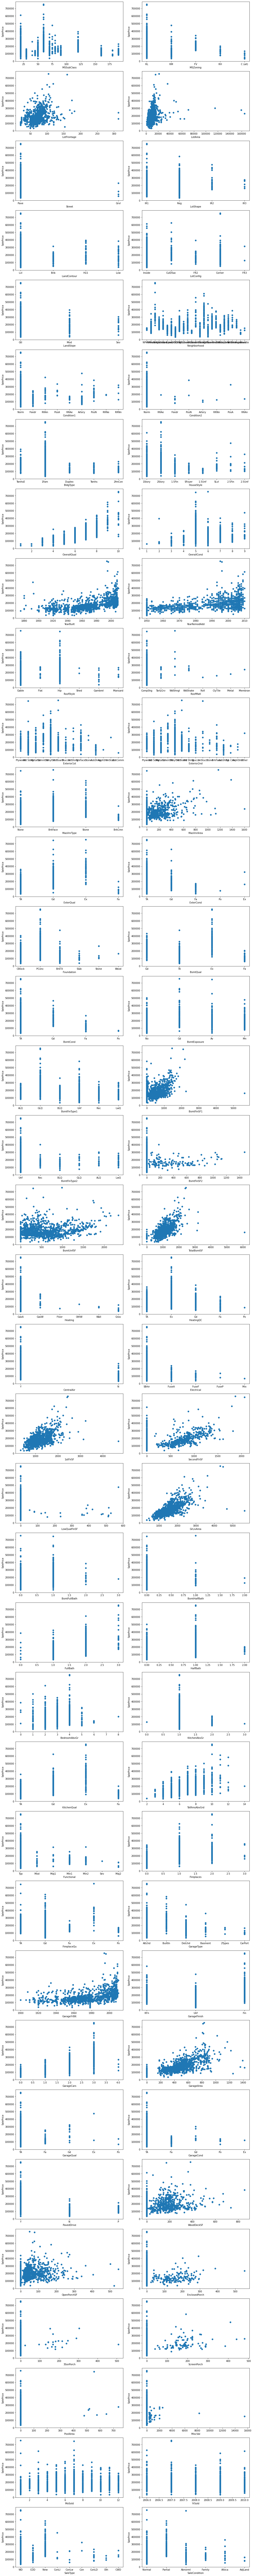

In [23]:
plt.figure(figsize=(15,155),facecolor='white')
plotnumber=1

for column in X:
    if plotnumber<=76:
        ax=plt.subplot(38,2,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('SalePrice',fontsize=10)
    
    plotnumber+=1
plt.tight_layout()

### From the above data visualization:

1. 'GrLivArea' and 'TotalBsmtSF' appear to be correlated with 'SalePrice' in a linear fashion. Both correlations are positive, which implies that when one variable increases, so does the other. In the instance of 'TotalBsmtSF,' the slope of the linear connection is extremely steep.
2. 'OverallQual' and 'YearBuilt' appear to be connected to 'SalePrice' as well. The relationship appears to be greater in the case of 'OverallQual,' where the scatter plot demonstrates how sales prices increase as overall quality improves.

In [7]:
#Converting strings into numberical format

from sklearn.preprocessing import LabelEncoder

lab_enc=LabelEncoder()

df1=lab_enc.fit_transform(df['MSZoning'])
df2=lab_enc.fit_transform(df['Street'])
df3=lab_enc.fit_transform(df['LotShape'])
df4=lab_enc.fit_transform(df['LandContour'])
df6=lab_enc.fit_transform(df['LotConfig'])
df7=lab_enc.fit_transform(df['LandSlope'])
df8=lab_enc.fit_transform(df['Neighborhood'])

df9=lab_enc.fit_transform(df['Condition1'])
df10=lab_enc.fit_transform(df['Condition2'])
df11=lab_enc.fit_transform(df['BldgType'])
df12=lab_enc.fit_transform(df['HouseStyle'])
df13=lab_enc.fit_transform(df['RoofStyle'])
df14=lab_enc.fit_transform(df['RoofMatl'])
df15=lab_enc.fit_transform(df['Exterior1st'])
df16=lab_enc.fit_transform(df['Exterior2nd'])

df17=lab_enc.fit_transform(df['MasVnrType'])
df18=lab_enc.fit_transform(df['ExterQual'])
df19=lab_enc.fit_transform(df['ExterCond'])
df20=lab_enc.fit_transform(df['Foundation'])
df21=lab_enc.fit_transform(df['BsmtQual'])
df22=lab_enc.fit_transform(df['BsmtCond'])
df23=lab_enc.fit_transform(df['BsmtExposure'])
df24=lab_enc.fit_transform(df['BsmtFinType1'])

df25=lab_enc.fit_transform(df['BsmtFinType2'])
df26=lab_enc.fit_transform(df['Heating'])
df27=lab_enc.fit_transform(df['HeatingQC'])
df28=lab_enc.fit_transform(df['CentralAir'])
df29=lab_enc.fit_transform(df['Electrical'])
df30=lab_enc.fit_transform(df['KitchenQual'])
df31=lab_enc.fit_transform(df['Functional'])
df32=lab_enc.fit_transform(df['FireplaceQu'])

df33=lab_enc.fit_transform(df['GarageType'])
df34=lab_enc.fit_transform(df['GarageFinish'])
df35=lab_enc.fit_transform(df['GarageQual'])
df36=lab_enc.fit_transform(df['GarageCond'])
df37=lab_enc.fit_transform(df['PavedDrive'])
df38=lab_enc.fit_transform(df['SaleType'])
df39=lab_enc.fit_transform(df['SaleCondition'])

df['MSZoning']=df1
df['Street']=df2
df['LotShape']=df3
df['LandContour']=df4
df['LotConfig']=df6
df['LandSlope']=df7
df['Neighborhood']=df8

df['Condition1']=df9
df['Condition2']=df10
df['BldgType']=df11
df['HouseStyle']=df12
df['RoofStyle']=df13
df['RoofMatl']=df14
df['Exterior1st']=df15
df['Exterior2nd']=df16

df['MasVnrType']=df17
df['ExterQual']=df18
df['ExterCond']=df19
df['Foundation']=df20
df['BsmtQual']=df21
df['BsmtCond']=df22
df['BsmtExposure']=df23
df['BsmtFinType1']=df24

df['BsmtFinType2']=df25
df['Heating']=df26
df['HeatingQC']=df27
df['CentralAir']=df28
df['Electrical']=df29
df['KitchenQual']=df30
df['Functional']=df31
df['FireplaceQu']=df32

df['GarageType']=df33
df['GarageFinish']=df34
df['GarageQual']=df35
df['GarageCond']=df36
df['PavedDrive']=df37
df['SaleType']=df38
df['SaleCondition']=df39

We have converted our categorical data to numerical data

### Finding correlation

In [12]:
df_corrnumericals=df[['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','SecondFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','SalePrice']]

In [13]:
df_corrcategorical=df[['MSZoning','Street','LotShape','LandContour','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition','SalePrice']]

In [14]:
corr_1=df_corrnumericals.corr()
print(corr_1.shape)
corr_2=df_corrcategorical.corr()
print(corr_2.shape)

(37, 37)
(39, 39)


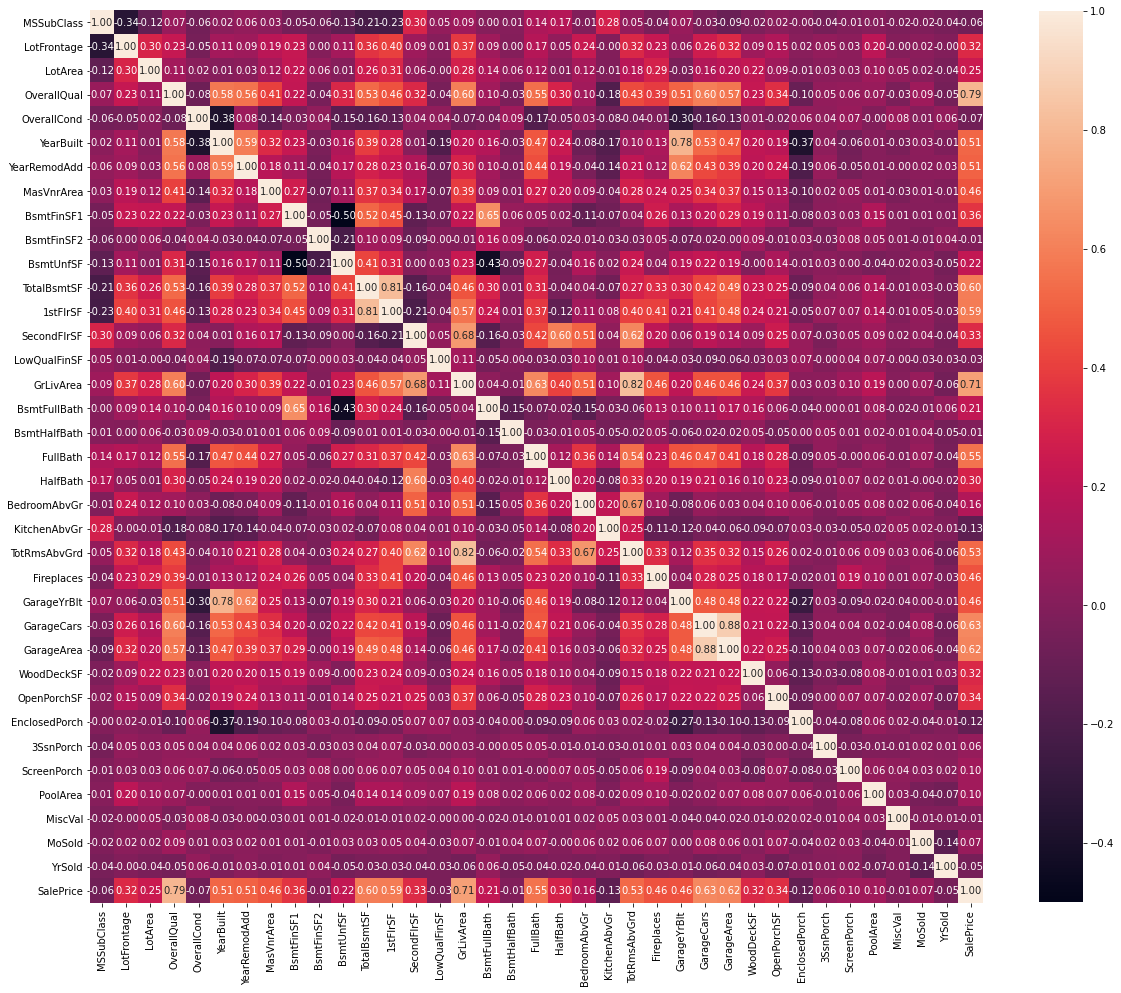

In [40]:
plt.figure(figsize=(20,20))

sns.heatmap(corr_1,cbar=True,square=True,cbar_kws={'shrink':0.82},fmt='.2f',annot=True,annot_kws={'size':10})
plt.show()

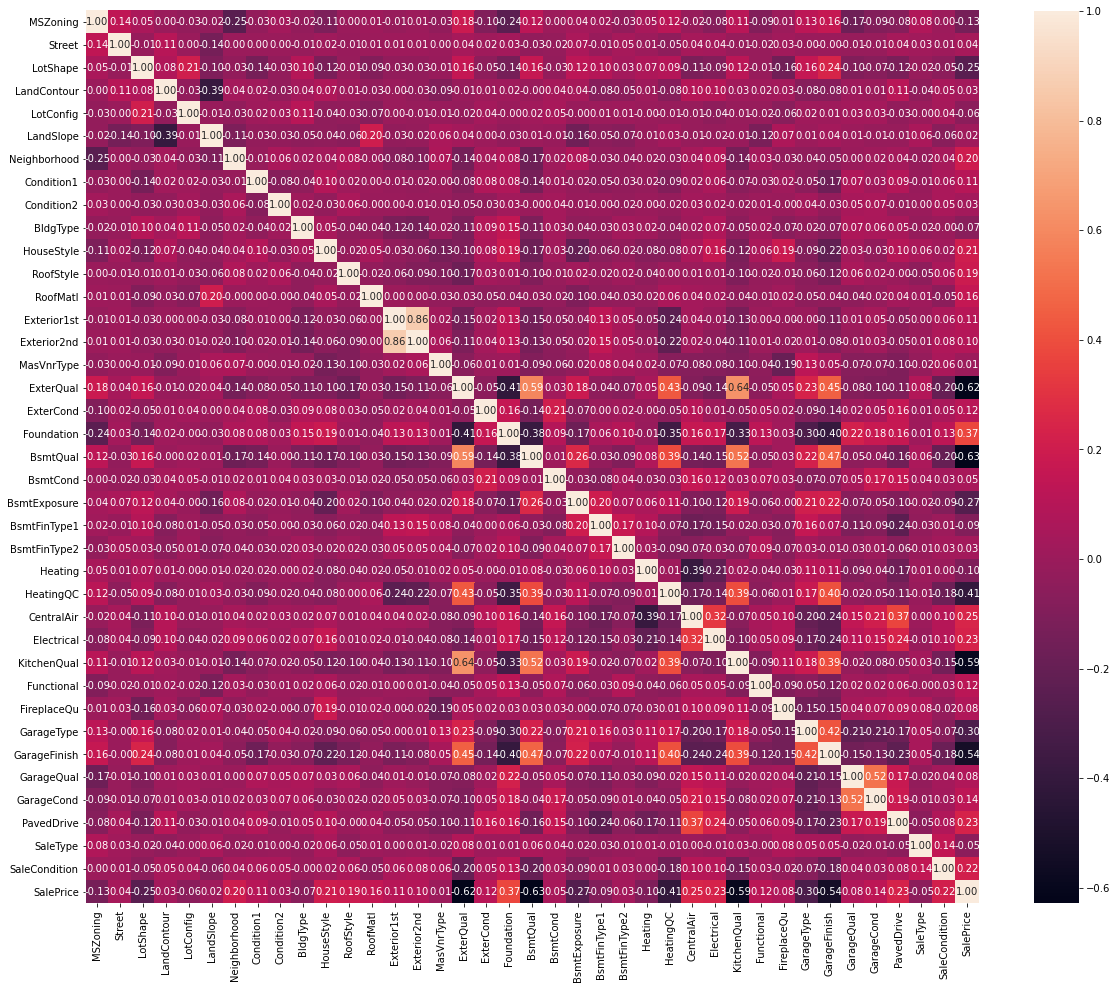

In [41]:
plt.figure(figsize=(20,20))

sns.heatmap(corr_2,cbar=True,square=True,cbar_kws={'shrink':0.82},fmt='.2f',annot=True,annot_kws={'size':10})
plt.show()

In [16]:
df.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.789185
GrLivArea        0.707300
GarageCars       0.628329
GarageArea       0.619000
TotalBsmtSF      0.595042
1stFlrSF         0.587642
FullBath         0.554988
TotRmsAbvGrd     0.528363
YearBuilt        0.514408
YearRemodAdd     0.507831
MasVnrArea       0.463626
Fireplaces       0.459611
GarageYrBlt      0.458007
Foundation       0.374169
BsmtFinSF1       0.362874
OpenPorchSF      0.339500
SecondFlrSF      0.330386
LotFrontage      0.323779
WoodDeckSF       0.315444
HalfBath         0.295592
LotArea          0.249499
CentralAir       0.246754
Electrical       0.234621
PavedDrive       0.231707
SaleCondition    0.217687
BsmtUnfSF        0.215724
BsmtFullBath     0.212924
HouseStyle       0.205502
Neighborhood     0.198942
RoofStyle        0.192654
RoofMatl         0.159865
BedroomAbvGr     0.158281
GarageCond       0.135071
Functional       0.118673
ExterCond        0.115167
Exterior1st      0.108451
Condition1       0.105820
PoolArea    

### From the above data visualization:

1. OverallQual has the highest positive correlation with SalePrice followed closely by GrLivarea while OverallCond, KitchenAbvGr, EnclosedPorch have the lowest correlations with SalePrice. (Numerical values)
2. GarageCars and GarageArea are also some of the most strongly correlated variables.
3. TotalBsmtSF and 1stFlrSF are also strongly correlated variables.
4. TotRmsAbvGrd and GrLivArea are also strongly correlated.

### Finding Outliers

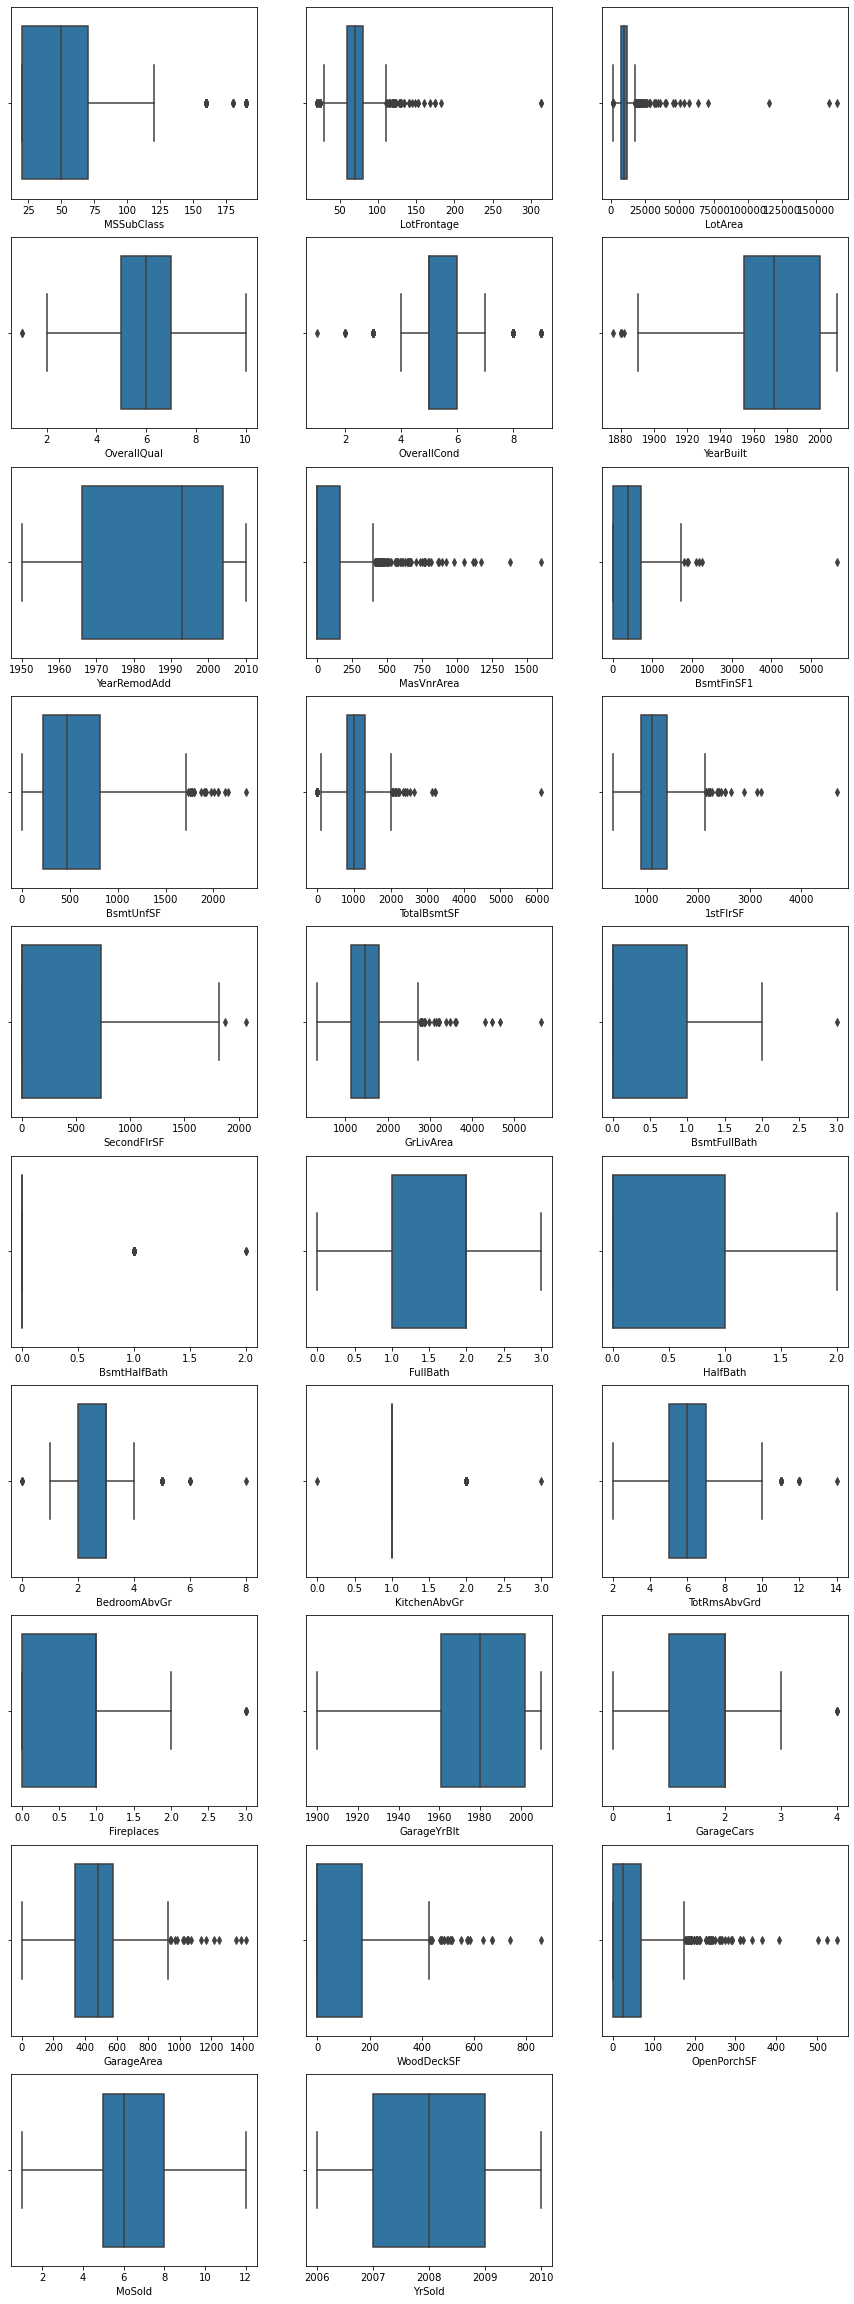

In [25]:
plt.figure(figsize=(15,50))
graph=1

for column in df_numericals:
    if(graph<=36):
        ax=plt.subplot(12,3,graph)
        sns.boxplot(df_numericals[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

We see there are many outliers in most of the variables.

### Removing Outliers

In [8]:
#Find the IQR (inter quantile range) to identify outliers

q1=df.quantile(0.25) #1st quantile
q3=df.quantile(0.75) #3rd quantile

#IQR
iqr=q3-q1
iqr

MSSubClass          50.00
MSZoning             0.00
LotFrontage         19.25
LotArea           3894.00
Street               0.00
                   ...   
MoSold               3.00
YrSold               2.00
SaleType             0.00
SaleCondition        0.00
SalePrice        84625.00
Length: 75, dtype: float64

In [9]:
index=np.where(df['BsmtFinSF1']>(q3.BsmtFinSF1)+(1.5*iqr.BsmtFinSF1))
df=df.drop(df.index[index])
print('Shape:',df.shape)
df.reset_index()

Shape: (1161, 75)


index  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0         0         120         3     70.98847     4928       1         0   
1         1          20         3     95.00000    15865       1         0   
2         2          60         3     92.00000     9920       1         0   
3         3          20         3    105.00000    11751       1         0   
4         4          20         3     70.98847    16635       1         0   
...     ...         ...       ...          ...      ...     ...       ...   
1156   1163          20         3     70.98847     9819       1         0   
1157   1164          20         3     67.00000     8777       1         3   
1158   1165         160         3     24.00000     2280       1         3   
1159   1166          70         0     50.00000     8500       1         3   
1160   1167          60         3     70.98847     7861       1         0   

      LandContour  LotConfig  LandSlope  ...  EnclosedPorch  3SsnPorch  \
0               3          4          0  ...              0          0   
1               3          4          1  ...              0          0   
2               3          1          0  ...              0          0   
3               3          4          0  ...              0          0   
4               3          2          0  ...              0          0   
...           ...        ...        ...  ...            ...        ...   
1156            3          4          0  ...              0          0   
1157            3          4          0  ...              0          0   
1158            3          2          0  ...              0          0   
1159            3          4          0  ...            172          0   
1160            3          4          0  ...              0          0   

      ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
0               0         0        0       2    2007         8              4   
1             224         0        0      10    2007         8              4   
2               0         0        0       6    2007         8              4   
3               0         0        0       1    2010         0              4   
4               0         0        0       6    2009         8              4   
...           ...       ...      ...     ...     ...       ...            ...   
1156            0         0        0       2    2010         8              4   
1157            0         0        0       5    2009         8              4   
1158            0         0        0       7    2009         8              4   
1159            0         0        0       7    2008         8              4   
1160            0         0        0       6    2006         8              4   

      SalePrice  
0        128000  
1        268000  
2        269790  
3        190000  
4        215000  
...         ...  
1156     122000  
1157     108000  
1158     148500  
1159      40000  
1160     183200  

[1161 rows x 76 columns]

In [10]:
index=np.where(df['TotalBsmtSF']<(q1.TotalBsmtSF)-(1.5*iqr.TotalBsmtSF))
df=df.drop(df.index[index])
print('Shape:',df.shape)
df.reset_index()

Shape: (1131, 75)


index  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0         0         120         3     70.98847     4928       1         0   
1         1          20         3     95.00000    15865       1         0   
2         2          60         3     92.00000     9920       1         0   
3         3          20         3    105.00000    11751       1         0   
4         4          20         3     70.98847    16635       1         0   
...     ...         ...       ...          ...      ...     ...       ...   
1126   1162          30         3     45.00000     8212       1         3   
1127   1163          20         3     70.98847     9819       1         0   
1128   1165         160         3     24.00000     2280       1         3   
1129   1166          70         0     50.00000     8500       1         3   
1130   1167          60         3     70.98847     7861       1         0   

      LandContour  LotConfig  LandSlope  ...  EnclosedPorch  3SsnPorch  \
0               3          4          0  ...              0          0   
1               3          4          1  ...              0          0   
2               3          1          0  ...              0          0   
3               3          4          0  ...              0          0   
4               3          2          0  ...              0          0   
...           ...        ...        ...  ...            ...        ...   
1126            3          4          0  ...             96          0   
1127            3          4          0  ...              0          0   
1128            3          2          0  ...              0          0   
1129            3          4          0  ...            172          0   
1130            3          4          0  ...              0          0   

      ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
0               0         0        0       2    2007         8              4   
1             224         0        0      10    2007         8              4   
2               0         0        0       6    2007         8              4   
3               0         0        0       1    2010         0              4   
4               0         0        0       6    2009         8              4   
...           ...       ...      ...     ...     ...       ...            ...   
1126            0         0        0       6    2010         8              4   
1127            0         0        0       2    2010         8              4   
1128            0         0        0       7    2009         8              4   
1129            0         0        0       7    2008         8              4   
1130            0         0        0       6    2006         8              4   

      SalePrice  
0        128000  
1        268000  
2        269790  
3        190000  
4        215000  
...         ...  
1126      58500  
1127     122000  
1128     148500  
1129      40000  
1130     183200  

[1131 rows x 76 columns]

In [11]:
index=np.where(df['LotArea']<(q1.LotArea)-(1.5*iqr.LotArea))
df=df.drop(df.index[index])
print('Shape:',df.shape)
df.reset_index()

Shape: (1120, 75)


index  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0         0         120         3     70.98847     4928       1         0   
1         1          20         3     95.00000    15865       1         0   
2         2          60         3     92.00000     9920       1         0   
3         3          20         3    105.00000    11751       1         0   
4         4          20         3     70.98847    16635       1         0   
...     ...         ...       ...          ...      ...     ...       ...   
1115   1162          30         3     45.00000     8212       1         3   
1116   1163          20         3     70.98847     9819       1         0   
1117   1165         160         3     24.00000     2280       1         3   
1118   1166          70         0     50.00000     8500       1         3   
1119   1167          60         3     70.98847     7861       1         0   

      LandContour  LotConfig  LandSlope  ...  EnclosedPorch  3SsnPorch  \
0               3          4          0  ...              0          0   
1               3          4          1  ...              0          0   
2               3          1          0  ...              0          0   
3               3          4          0  ...              0          0   
4               3          2          0  ...              0          0   
...           ...        ...        ...  ...            ...        ...   
1115            3          4          0  ...             96          0   
1116            3          4          0  ...              0          0   
1117            3          2          0  ...              0          0   
1118            3          4          0  ...            172          0   
1119            3          4          0  ...              0          0   

      ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
0               0         0        0       2    2007         8              4   
1             224         0        0      10    2007         8              4   
2               0         0        0       6    2007         8              4   
3               0         0        0       1    2010         0              4   
4               0         0        0       6    2009         8              4   
...           ...       ...      ...     ...     ...       ...            ...   
1115            0         0        0       6    2010         8              4   
1116            0         0        0       2    2010         8              4   
1117            0         0        0       7    2009         8              4   
1118            0         0        0       7    2008         8              4   
1119            0         0        0       6    2006         8              4   

      SalePrice  
0        128000  
1        268000  
2        269790  
3        190000  
4        215000  
...         ...  
1115      58500  
1116     122000  
1117     148500  
1118      40000  
1119     183200  

[1120 rows x 76 columns]

In [12]:
index=np.where(df['YearBuilt']<(q1.YearBuilt)-(1.5*iqr.YearBuilt))
df=df.drop(df.index[index])
print('Shape:',df.shape)
df.reset_index()

Shape: (1114, 75)


index  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0         0         120         3     70.98847     4928       1         0   
1         1          20         3     95.00000    15865       1         0   
2         2          60         3     92.00000     9920       1         0   
3         3          20         3    105.00000    11751       1         0   
4         4          20         3     70.98847    16635       1         0   
...     ...         ...       ...          ...      ...     ...       ...   
1109   1162          30         3     45.00000     8212       1         3   
1110   1163          20         3     70.98847     9819       1         0   
1111   1165         160         3     24.00000     2280       1         3   
1112   1166          70         0     50.00000     8500       1         3   
1113   1167          60         3     70.98847     7861       1         0   

      LandContour  LotConfig  LandSlope  ...  EnclosedPorch  3SsnPorch  \
0               3          4          0  ...              0          0   
1               3          4          1  ...              0          0   
2               3          1          0  ...              0          0   
3               3          4          0  ...              0          0   
4               3          2          0  ...              0          0   
...           ...        ...        ...  ...            ...        ...   
1109            3          4          0  ...             96          0   
1110            3          4          0  ...              0          0   
1111            3          2          0  ...              0          0   
1112            3          4          0  ...            172          0   
1113            3          4          0  ...              0          0   

      ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
0               0         0        0       2    2007         8              4   
1             224         0        0      10    2007         8              4   
2               0         0        0       6    2007         8              4   
3               0         0        0       1    2010         0              4   
4               0         0        0       6    2009         8              4   
...           ...       ...      ...     ...     ...       ...            ...   
1109            0         0        0       6    2010         8              4   
1110            0         0        0       2    2010         8              4   
1111            0         0        0       7    2009         8              4   
1112            0         0        0       7    2008         8              4   
1113            0         0        0       6    2006         8              4   

      SalePrice  
0        128000  
1        268000  
2        269790  
3        190000  
4        215000  
...         ...  
1109      58500  
1110     122000  
1111     148500  
1112      40000  
1113     183200  

[1114 rows x 76 columns]

In [13]:
index=np.where(df['GarageYrBlt']<(q1.GarageYrBlt)-(1.5*iqr.GarageYrBlt))
df=df.drop(df.index[index])
print('Shape:',df.shape)
df.reset_index()

Shape: (1113, 75)


index  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0         0         120         3     70.98847     4928       1         0   
1         1          20         3     95.00000    15865       1         0   
2         2          60         3     92.00000     9920       1         0   
3         3          20         3    105.00000    11751       1         0   
4         4          20         3     70.98847    16635       1         0   
...     ...         ...       ...          ...      ...     ...       ...   
1108   1162          30         3     45.00000     8212       1         3   
1109   1163          20         3     70.98847     9819       1         0   
1110   1165         160         3     24.00000     2280       1         3   
1111   1166          70         0     50.00000     8500       1         3   
1112   1167          60         3     70.98847     7861       1         0   

      LandContour  LotConfig  LandSlope  ...  EnclosedPorch  3SsnPorch  \
0               3          4          0  ...              0          0   
1               3          4          1  ...              0          0   
2               3          1          0  ...              0          0   
3               3          4          0  ...              0          0   
4               3          2          0  ...              0          0   
...           ...        ...        ...  ...            ...        ...   
1108            3          4          0  ...             96          0   
1109            3          4          0  ...              0          0   
1110            3          2          0  ...              0          0   
1111            3          4          0  ...            172          0   
1112            3          4          0  ...              0          0   

      ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
0               0         0        0       2    2007         8              4   
1             224         0        0      10    2007         8              4   
2               0         0        0       6    2007         8              4   
3               0         0        0       1    2010         0              4   
4               0         0        0       6    2009         8              4   
...           ...       ...      ...     ...     ...       ...            ...   
1108            0         0        0       6    2010         8              4   
1109            0         0        0       2    2010         8              4   
1110            0         0        0       7    2009         8              4   
1111            0         0        0       7    2008         8              4   
1112            0         0        0       6    2006         8              4   

      SalePrice  
0        128000  
1        268000  
2        269790  
3        190000  
4        215000  
...         ...  
1108      58500  
1109     122000  
1110     148500  
1111      40000  
1112     183200  

[1113 rows x 76 columns]

In [14]:
index=np.where(df['SecondFlrSF']>(q3.SecondFlrSF)+(1.5*iqr.SecondFlrSF))
df=df.drop(df.index[index])
print('Shape:',df.shape)
df.reset_index()

Shape: (1112, 75)


index  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0         0         120         3     70.98847     4928       1         0   
1         1          20         3     95.00000    15865       1         0   
2         2          60         3     92.00000     9920       1         0   
3         3          20         3    105.00000    11751       1         0   
4         4          20         3     70.98847    16635       1         0   
...     ...         ...       ...          ...      ...     ...       ...   
1107   1162          30         3     45.00000     8212       1         3   
1108   1163          20         3     70.98847     9819       1         0   
1109   1165         160         3     24.00000     2280       1         3   
1110   1166          70         0     50.00000     8500       1         3   
1111   1167          60         3     70.98847     7861       1         0   

      LandContour  LotConfig  LandSlope  ...  EnclosedPorch  3SsnPorch  \
0               3          4          0  ...              0          0   
1               3          4          1  ...              0          0   
2               3          1          0  ...              0          0   
3               3          4          0  ...              0          0   
4               3          2          0  ...              0          0   
...           ...        ...        ...  ...            ...        ...   
1107            3          4          0  ...             96          0   
1108            3          4          0  ...              0          0   
1109            3          2          0  ...              0          0   
1110            3          4          0  ...            172          0   
1111            3          4          0  ...              0          0   

      ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
0               0         0        0       2    2007         8              4   
1             224         0        0      10    2007         8              4   
2               0         0        0       6    2007         8              4   
3               0         0        0       1    2010         0              4   
4               0         0        0       6    2009         8              4   
...           ...       ...      ...     ...     ...       ...            ...   
1107            0         0        0       6    2010         8              4   
1108            0         0        0       2    2010         8              4   
1109            0         0        0       7    2009         8              4   
1110            0         0        0       7    2008         8              4   
1111            0         0        0       6    2006         8              4   

      SalePrice  
0        128000  
1        268000  
2        269790  
3        190000  
4        215000  
...         ...  
1107      58500  
1108     122000  
1109     148500  
1110      40000  
1111     183200  

[1112 rows x 76 columns]

In [15]:
(1168-1112)/1168*100

4.794520547945205

We did not remove all the outliers since that would cause a huge amount of data loss. Right now we have lost around 5% of data which is affordable.

### Removing skewness

In [27]:
df_numericals.skew()

MSSubClass       1.422019
LotFrontage      2.450241
LotArea         10.659285
OverallQual      0.175082
OverallCond      0.580714
YearBuilt       -0.579204
YearRemodAdd    -0.495864
MasVnrArea       2.826173
BsmtFinSF1       1.871606
BsmtUnfSF        0.909057
TotalBsmtSF      1.744591
1stFlrSF         1.513707
SecondFlrSF      0.823479
GrLivArea        1.449952
BsmtFullBath     0.627106
BsmtHalfBath     4.264403
FullBath         0.057809
HalfBath         0.656492
BedroomAbvGr     0.243855
KitchenAbvGr     4.365259
TotRmsAbvGrd     0.644657
Fireplaces       0.671966
GarageYrBlt     -0.644564
GarageCars      -0.358556
GarageArea       0.189665
WoodDeckSF       1.504929
OpenPorchSF      2.410840
MoSold           0.220979
YrSold           0.115765
dtype: float64

In [16]:
df['LotFrontage']=np.sqrt(df['LotFrontage'])
df['LotArea']=np.sqrt(df['LotArea'])
df['MasVnrArea']=np.sqrt(df['MasVnrArea'])
df['BsmtFinSF1']=np.sqrt(df['BsmtFinSF1'])
df['BsmtFinSF2']=np.sqrt(df['BsmtFinSF2'])
df['BsmtUnfSF']=np.sqrt(df['BsmtUnfSF'])
df['TotalBsmtSF']=np.sqrt(df['TotalBsmtSF'])
df['1stFlrSF']=np.sqrt(df['1stFlrSF'])
df['SecondFlrSF']=np.sqrt(df['SecondFlrSF'])
df['LowQualFinSF']=np.sqrt(df['LowQualFinSF'])
df['GrLivArea']=np.sqrt(df['GrLivArea'])
df['WoodDeckSF']=np.sqrt(df['WoodDeckSF'])
df['OpenPorchSF']=np.sqrt(df['OpenPorchSF'])
df['EnclosedPorch']=np.sqrt(df['EnclosedPorch'])
df['3SsnPorch']=np.sqrt(df['3SsnPorch'])
df['ScreenPorch']=np.sqrt(df['ScreenPorch'])
df['PoolArea']=np.sqrt(df['PoolArea'])
df['MiscVal']=np.sqrt(df['MiscVal'])

## Selecting best feature

In [17]:
from sklearn.feature_selection import SelectKBest, f_classif

In [18]:
y=df['SalePrice']
X=df.drop(columns=['SalePrice'])

In [19]:
X.shape

(1112, 74)

In [20]:
best_features=SelectKBest(score_func=f_classif,k=40)
fit=best_features.fit(X,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(X.columns)

feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=['Feature_Name','Score'] #name output columns
print(feature_scores.nlargest(40,'Score')) #print 40 best features

    Feature_Name     Score
14   OverallQual  5.149582
24     ExterQual  3.572308
43     GrLivArea  3.126663
27      BsmtQual  2.807488
50   KitchenQual  2.738808
58    GarageCars  2.468362
46      FullBath  2.432211
59    GarageArea  2.373555
40      1stFlrSF  2.268067
57  GarageFinish  2.190499
16     YearBuilt  2.179121
35   TotalBsmtSF  2.123556
17  YearRemodAdd  1.821069
4         Street  1.816640
56   GarageYrBlt  1.751381
1       MSZoning  1.687061
51  TotRmsAbvGrd  1.629845
26    Foundation  1.585004
53    Fireplaces  1.584844
23    MasVnrArea  1.580853
64   OpenPorchSF  1.570705
3        LotArea  1.543094
69       MiscVal  1.490801
38    CentralAir  1.451007
31    BsmtFinSF1  1.449826
47      HalfBath  1.351555
5       LotShape  1.343748
37     HeatingQC  1.318367
36       Heating  1.288921
28      BsmtCond  1.268416
9   Neighborhood  1.258020
63    WoodDeckSF  1.251856
2    LotFrontage  1.236566
54   FireplaceQu  1.203226
55    GarageType  1.194020
41   SecondFlrSF  1.189878
2

We have selected 40 best features with respect to Sale Price among the 74 features.

In [21]:
df=df[['OverallQual','ExterQual','GrLivArea','BsmtQual','KitchenQual','GarageCars','FullBath','GarageArea','1stFlrSF','GarageFinish','YearBuilt','TotalBsmtSF','YearRemodAdd','Street','GarageYrBlt','MSZoning','TotRmsAbvGrd','Foundation','Fireplaces','MasVnrArea','OpenPorchSF','LotArea','MiscVal','CentralAir','BsmtFinSF1','HalfBath','LotShape','HeatingQC','Heating','BsmtCond','Neighborhood','WoodDeckSF','LotFrontage','FireplaceQu','GarageType','SecondFlrSF','BsmtExposure','MasVnrType','Electrical','BldgType']]

In [22]:
X=df

In [23]:
X.shape

(1112, 40)

In [24]:
#Feature Scaling
scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)

vif=pd.DataFrame()
vif['score']=[variance_inflation_factor(X_scaler,i) for i in range(X_scaler.shape[1])]
vif['Features']=X.columns

vif

score      Features
0    3.411386   OverallQual
1    2.424910     ExterQual
2   43.818682     GrLivArea
3    2.041251      BsmtQual
4    2.046020   KitchenQual
5    5.528327    GarageCars
6    3.070291      FullBath
7    5.342874    GarageArea
8   28.276521      1stFlrSF
9    1.948804  GarageFinish
10   6.024791     YearBuilt
11   4.947137   TotalBsmtSF
12   2.444004  YearRemodAdd
13   1.145724        Street
14   3.557388   GarageYrBlt
15   1.310950      MSZoning
16   3.769092  TotRmsAbvGrd
17   2.220164    Foundation
18   1.757329    Fireplaces
19   1.839734    MasVnrArea
20   1.423990   OpenPorchSF
21   1.775042       LotArea
22   1.058512       MiscVal
23   1.530886    CentralAir
24   1.306240    BsmtFinSF1
25   2.336808      HalfBath
26   1.178640      LotShape
27   1.607399     HeatingQC
28   1.244246       Heating
29   1.082713      BsmtCond
30   1.195169  Neighborhood
31   1.235987    WoodDeckSF
32   1.699123   LotFrontage
33   1.409648   FireplaceQu
34   1.699595    GarageType
35  33.779819   SecondFlrSF
36   1.305831  BsmtExposure
37   1.418914    MasVnrType
38   1.281845    Electrical
39   1.651884      BldgType

In [25]:
X.drop(columns=['SecondFlrSF'],axis=1,inplace=True)

Dropped SecondFlrSF since it was highly correlated with GrLivArea.

## Finding best random state

In [26]:
maxAccu=0
maxRs=0
for i in range(1,200):
    X_train,x_test,Y_train,y_test=train_test_split(X_scaler,y,test_size=0.25,random_state=i)
    mod=DecisionTreeRegressor()
    mod.fit(X_train,Y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Best accuracy is:",maxAccu,"on Random State",maxRs)

Best accuracy is: 0.80209554248774 on Random State 185


In [27]:
X_train,x_test,Y_train,y_test=train_test_split(X_scaler,y,test_size=0.25,random_state=185)

### Predicting with different models

In [28]:
DTC=DecisionTreeRegressor()
DTC.fit(X_train,Y_train)
pred=DTC.predict(x_test)
print(r2_score(y_test,pred))

0.7365631694095114


In [29]:
lr=LinearRegression()
lr.fit(X_train,Y_train)
pred=lr.predict(x_test)
print(r2_score(y_test,pred))

0.8838209898296076


In [30]:
RFR=RandomForestRegressor()
RFR.fit(X_train,Y_train)
pred=RFR.predict(x_test)
print(r2_score(y_test,pred))

0.8866947818540951


In [31]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
ada.fit(X_train,Y_train)
pred=ada.predict(x_test)
print(r2_score(y_test,pred))

0.85029516538742


In [32]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(X_train,Y_train)
pred=gbr.predict(x_test)
print(r2_score(y_test,pred))

0.9130577965562511


In [33]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(X_train,Y_train)
pred=knn.predict(x_test)
print(r2_score(y_test,pred))

0.8391263401691001


In [34]:
import xgboost as xgb
xgb=xgb.XGBRegressor()
xgb.fit(X_train,Y_train)
pred=xgb.predict(x_test)
print(r2_score(y_test,pred))

0.9008225747150398


## Regularization

In [35]:
from sklearn.linear_model import Lasso

In [36]:
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [37]:
ls=Lasso(alpha=10,random_state=0)
ls.fit(X_train,Y_train)
ls.score(X_train,Y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.8838455350351817

## Cross validation

In [38]:
from sklearn.model_selection import cross_val_score

In [39]:
print(cross_val_score(DTC,X_scaler,y,cv=5).mean())

0.709551159819362


In [40]:
print(cross_val_score(lr,X_scaler,y,cv=5).mean())

0.8536637395737239


In [41]:
print(cross_val_score(RFR,X_scaler,y,cv=5).mean())

0.8614677527483913


In [42]:
print(cross_val_score(ada,X_scaler,y,cv=5).mean())

0.812295753936262


In [43]:
print(cross_val_score(gbr,X_scaler,y,cv=5).mean())

0.8773549402659715


In [44]:
print(cross_val_score(knn,X_scaler,y,cv=5).mean())

0.7973955361663048


In [45]:
print(cross_val_score(xgb,X_scaler,y,cv=5).mean())

0.8591662058575767


## Hyperparameter Tuning

In [49]:
parameters={'criterion':['friedman_mse','squared_error','mse','mae'],'max_features':['auto','sqrt','log2'],'n_estimators':[40,47,49,50],'learning_rate':[0.30,0.40,0.45],'loss':['squared_error','ls','absolute_error','lad','huber','quantile']}
GBR=GradientBoostingRegressor()
clf=RandomizedSearchCV(GBR, cv=5, param_distributions=parameters)
clf.fit(X_train,Y_train)

print(clf.best_params_)

{'n_estimators': 47, 'max_features': 'auto', 'loss': 'ls', 'learning_rate': 0.3, 'criterion': 'mse'}


In [58]:
Final_model=GradientBoostingRegressor(max_features='auto',criterion='mse',n_estimators=47,loss='ls',learning_rate=0.3)
Final_model.fit(X_train,Y_train)
pred=Final_model.predict(x_test)
acc=r2_score(y_test,pred)
print('Accuracy:',acc*100)

Accuracy: 90.51786813222704


The accuracy has increased to 91%

## Saving Model

In [59]:
import pickle
filename='FinalisedModel_Housing_Final.pkl'
pickle.dump(gbr,open(filename,'wb'))

# Test Data

In [23]:
df1=pd.read_csv('test.csv')
df1.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      7    2007        WD         Normal  
1       0      8    2009       COD        Abnorml  
2       0      6    2009        WD         Normal  
3       0      7    2009        WD         Normal  
4       0      1    2008        WD         Normal  

[5 rows x 80 columns]

In [32]:
df1.shape

(292, 80)

In [21]:
df1.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley            278
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

<AxesSubplot:>

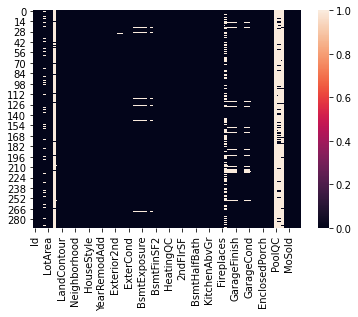

In [26]:
sns.heatmap(df1.isna())

In [61]:
df1.rename(columns={'2ndFlrSF':'SecondFlrSF'},inplace=True)

In [62]:
df1.drop(columns=['Id','Alley','Utilities','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [63]:
df1['LotFrontage']=df1['LotFrontage'].fillna(df1['LotFrontage'].mean())
df1['MasVnrType']=df1['MasVnrType'].fillna(df1['MasVnrType'].mode()[0])
df1['MasVnrArea']=df1['MasVnrArea'].fillna(df1['MasVnrArea'].mean())
df1['BsmtQual']=df1['BsmtQual'].fillna(df1['BsmtQual'].mode()[0])
df1['BsmtCond']=df1['BsmtCond'].fillna(df1['BsmtCond'].mode()[0])
df1['BsmtExposure']=df1['BsmtExposure'].fillna(df1['BsmtExposure'].mode()[0])
df1['BsmtFinType1']=df1['BsmtFinType1'].fillna(df1['BsmtFinType1'].mode()[0])
df1['BsmtFinType2']=df1['BsmtFinType2'].fillna(df1['BsmtFinType2'].mode()[0])
df1['Electrical']=df1['Electrical'].fillna(df1['Electrical'].mode()[0])
df1['FireplaceQu']=df1['FireplaceQu'].fillna(df1['FireplaceQu'].mode()[0])
df1['GarageType']=df1['GarageType'].fillna(df1['GarageType'].mode()[0])
df1['GarageYrBlt']=df1['GarageYrBlt'].fillna(df1['GarageYrBlt'].mean())
df1['GarageFinish']=df1['GarageFinish'].fillna(df1['GarageFinish'].mode()[0])
df1['GarageQual']=df1['GarageQual'].fillna(df1['GarageQual'].mode()[0])
df1['GarageCond']=df1['GarageCond'].fillna(df1['GarageCond'].mode()[0])

<AxesSubplot:>

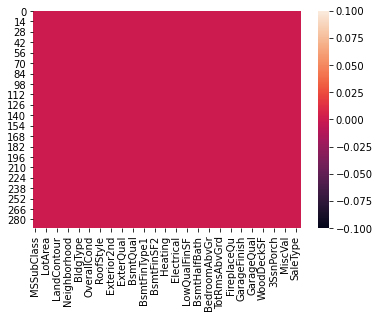

In [38]:
sns.heatmap(df1.isna())

In [64]:
#Converting strings into numberical format

from sklearn.preprocessing import LabelEncoder

lab_enc=LabelEncoder()

df111=lab_enc.fit_transform(df1['MSZoning'])
df2=lab_enc.fit_transform(df1['Street'])
df3=lab_enc.fit_transform(df1['LotShape'])
df4=lab_enc.fit_transform(df1['LandContour'])
df6=lab_enc.fit_transform(df1['LotConfig'])
df7=lab_enc.fit_transform(df1['LandSlope'])
df8=lab_enc.fit_transform(df1['Neighborhood'])

df9=lab_enc.fit_transform(df1['Condition1'])
df10=lab_enc.fit_transform(df1['Condition2'])
df11=lab_enc.fit_transform(df1['BldgType'])
df12=lab_enc.fit_transform(df1['HouseStyle'])
df13=lab_enc.fit_transform(df1['RoofStyle'])
df14=lab_enc.fit_transform(df1['RoofMatl'])
df15=lab_enc.fit_transform(df1['Exterior1st'])
df16=lab_enc.fit_transform(df1['Exterior2nd'])

df17=lab_enc.fit_transform(df1['MasVnrType'])
df18=lab_enc.fit_transform(df1['ExterQual'])
df19=lab_enc.fit_transform(df1['ExterCond'])
df20=lab_enc.fit_transform(df1['Foundation'])
df21=lab_enc.fit_transform(df1['BsmtQual'])
df22=lab_enc.fit_transform(df1['BsmtCond'])
df23=lab_enc.fit_transform(df1['BsmtExposure'])
df24=lab_enc.fit_transform(df1['BsmtFinType1'])

df25=lab_enc.fit_transform(df1['BsmtFinType2'])
df26=lab_enc.fit_transform(df1['Heating'])
df27=lab_enc.fit_transform(df1['HeatingQC'])
df28=lab_enc.fit_transform(df1['CentralAir'])
df29=lab_enc.fit_transform(df1['Electrical'])
df30=lab_enc.fit_transform(df1['KitchenQual'])
df31=lab_enc.fit_transform(df1['Functional'])
df32=lab_enc.fit_transform(df1['FireplaceQu'])

df33=lab_enc.fit_transform(df1['GarageType'])
df34=lab_enc.fit_transform(df1['GarageFinish'])
df35=lab_enc.fit_transform(df1['GarageQual'])
df36=lab_enc.fit_transform(df1['GarageCond'])
df37=lab_enc.fit_transform(df1['PavedDrive'])
df38=lab_enc.fit_transform(df1['SaleType'])
df39=lab_enc.fit_transform(df1['SaleCondition'])

df1['MSZoning']=df111
df1['Street']=df2
df1['LotShape']=df3
df1['LandContour']=df4
df1['LotConfig']=df6
df1['LandSlope']=df7
df1['Neighborhood']=df8

df1['Condition1']=df9
df1['Condition2']=df10
df1['BldgType']=df11
df1['HouseStyle']=df12
df1['RoofStyle']=df13
df1['RoofMatl']=df14
df1['Exterior1st']=df15
df1['Exterior2nd']=df16

df1['MasVnrType']=df17
df1['ExterQual']=df18
df1['ExterCond']=df19
df1['Foundation']=df20
df1['BsmtQual']=df21
df1['BsmtCond']=df22
df1['BsmtExposure']=df23
df1['BsmtFinType1']=df24

df1['BsmtFinType2']=df25
df1['Heating']=df26
df1['HeatingQC']=df27
df1['CentralAir']=df28
df1['Electrical']=df29
df1['KitchenQual']=df30
df1['Functional']=df31
df1['FireplaceQu']=df32

df1['GarageType']=df33
df1['GarageFinish']=df34
df1['GarageQual']=df35
df1['GarageCond']=df36
df1['PavedDrive']=df37
df1['SaleType']=df38
df1['SaleCondition']=df39

In [139]:
df1_corrnumericals=df1[['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','SecondFlrSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','MiscVal','MoSold','YrSold']]
df1_corrcategorical=df1[['MSZoning','Street','LotShape','LandContour','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition']]
corr_11=df1_corrnumericals.corr()
print(corr_11.shape)
corr_12=df1_corrcategorical.corr()
print(corr_12.shape)

(34, 34)
(38, 38)


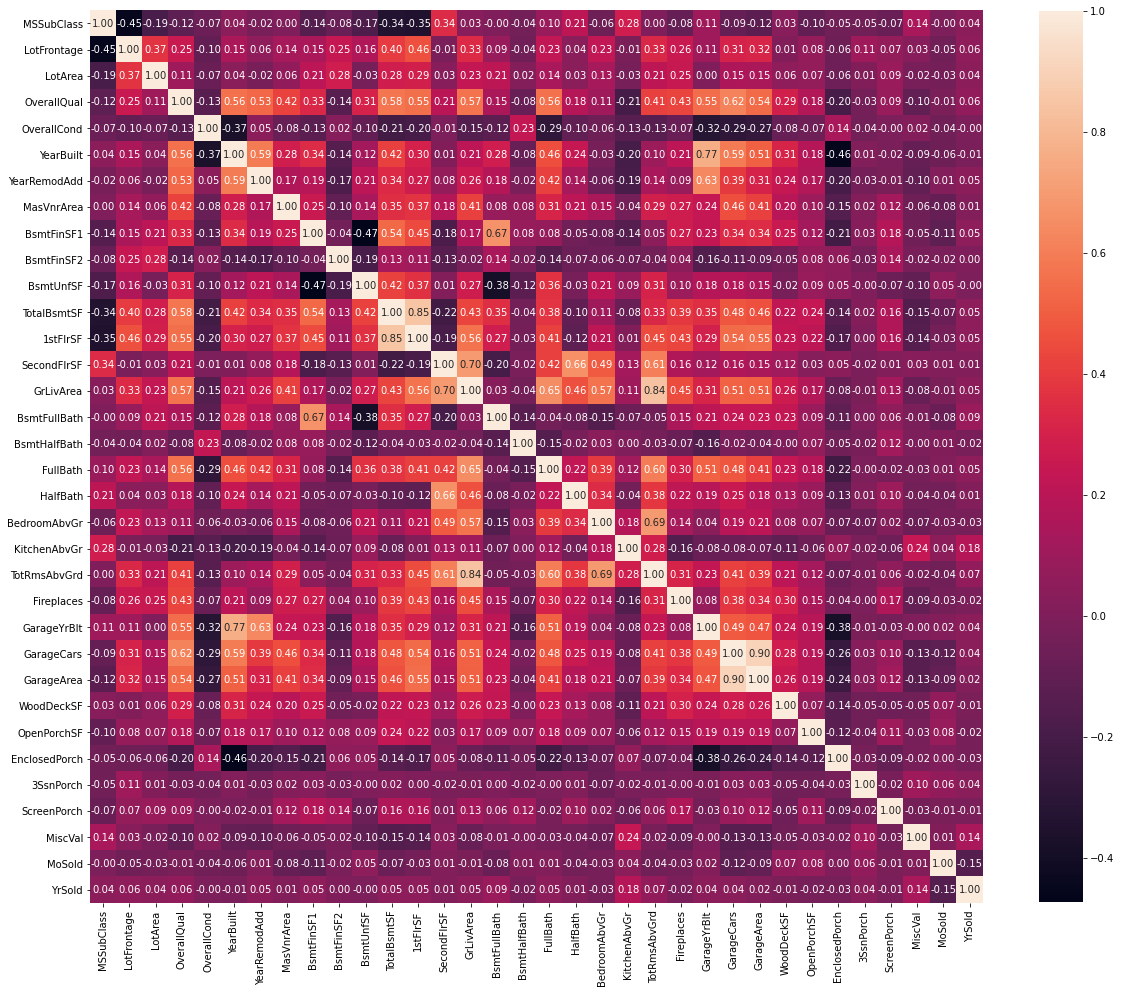

In [140]:
plt.figure(figsize=(20,20))

sns.heatmap(corr_11,cbar=True,square=True,cbar_kws={'shrink':0.82},fmt='.2f',annot=True,annot_kws={'size':10})
plt.show()

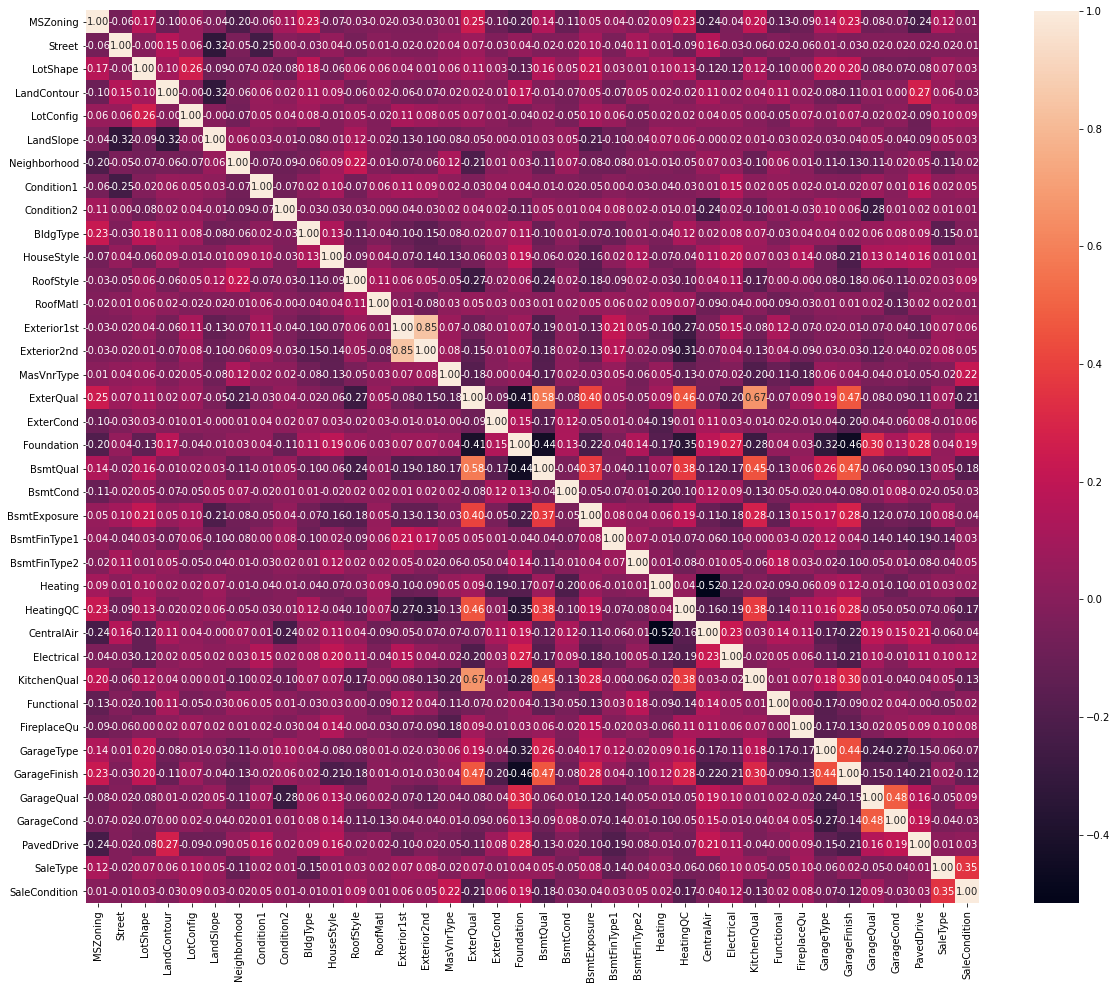

In [141]:
plt.figure(figsize=(20,20))

sns.heatmap(corr_12,cbar=True,square=True,cbar_kws={'shrink':0.82},fmt='.2f',annot=True,annot_kws={'size':10})
plt.show()

In [124]:
df1_numericals=df1[['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','SecondFlrSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','MoSold','YrSold']]

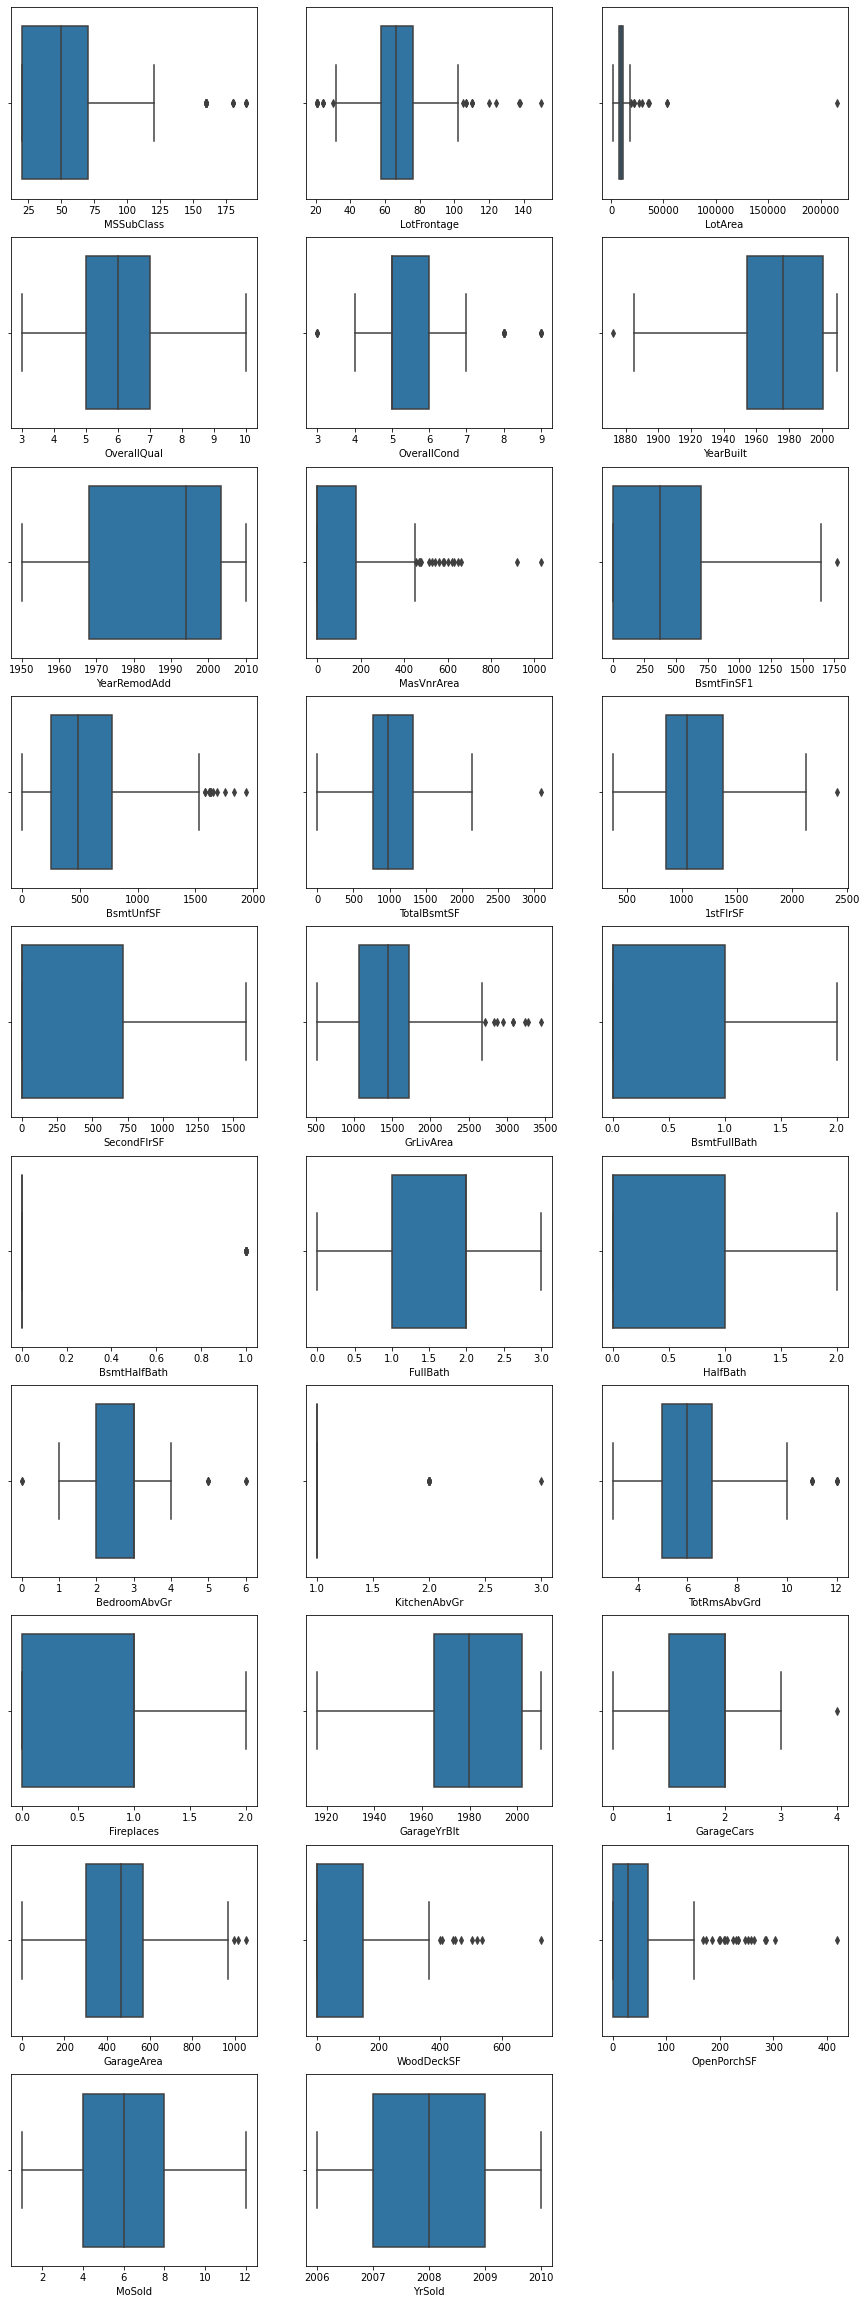

In [46]:
plt.figure(figsize=(15,50))
graph=1

for column in df1_numericals:
    if(graph<=36):
        ax=plt.subplot(12,3,graph)
        sns.boxplot(df1_numericals[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

In [65]:
#Find the IQR (inter quantile range) to identify outliers

q11=df1.quantile(0.25) #1st quantile
q13=df1.quantile(0.75) #3rd quantile

#IQR
iqr1=q13-q11
iqr1

MSSubClass         50.00
MSZoning            0.00
LotFrontage        18.25
LotArea          4458.75
Street              0.00
                  ...   
MiscVal             0.00
MoSold              4.00
YrSold              2.00
SaleType            0.00
SaleCondition       0.00
Length: 74, dtype: float64

In [66]:
index=np.where(df1['BsmtFinSF1']>(q13.BsmtFinSF1)+(1.5*iqr1.BsmtFinSF1))
df1=df1.drop(df1.index[index])
print('Shape:',df1.shape)
df1.reset_index()

Shape: (291, 74)


index  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0        0          20         2    86.000000    14157       1         0   
1        1         120         2    66.425101     5814       1         0   
2        2          20         2    66.425101    11838       1         3   
3        3          70         2    75.000000    12000       1         3   
4        4          60         2    86.000000    14598       1         0   
..     ...         ...       ...          ...      ...     ...       ...   
286    287          20         2    78.000000    10206       1         3   
287    288          20         2    57.000000     9245       1         1   
288    289          20         2    66.425101    11241       1         0   
289    290          50         3    50.000000     5000       1         3   
290    291         160         3    21.000000     1953       1         3   

     LandContour  LotConfig  LandSlope  ...  OpenPorchSF  EnclosedPorch  \
0              1          0          0  ...           51              0   
1              3          1          0  ...            0              0   
2              3          4          0  ...          151              0   
3              0          4          0  ...            0              0   
4              3          1          0  ...           18              0   
..           ...        ...        ...  ...          ...            ...   
286            3          4          0  ...           99              0   
287            3          4          0  ...            0              0   
288            3          1          0  ...            0              0   
289            3          0          0  ...           24             36   
290            3          4          0  ...            0              0   

     3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  \
0            0            0         0        0       7    2007         5   
1            0            0         0        0       8    2009         0   
2            0            0         0        0       6    2009         5   
3            0            0         0        0       7    2009         5   
4            0            0         0        0       1    2008         5   
..         ...          ...       ...      ...     ...     ...       ...   
286          0            0         0        0      10    2008         5   
287          0            0         0        0       2    2008         5   
288          0            0         0      700       3    2010         5   
289          0            0         0        0      10    2006         5   
290          0            0         0        0       6    2006         5   

     SaleCondition  
0                2  
1                0  
2                2  
3                2  
4                2  
..             ...  
286              2  
287              2  
288              2  
289              2  
290              2  

[291 rows x 75 columns]

In [67]:
index=np.where(df1['YearBuilt']<(q11.YearBuilt)-(1.5*iqr1.YearBuilt))
df1=df1.drop(df1.index[index])
print('Shape:',df1.shape)
df1.reset_index()

Shape: (290, 74)


index  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0        0          20         2    86.000000    14157       1         0   
1        1         120         2    66.425101     5814       1         0   
2        2          20         2    66.425101    11838       1         3   
3        3          70         2    75.000000    12000       1         3   
4        4          60         2    86.000000    14598       1         0   
..     ...         ...       ...          ...      ...     ...       ...   
285    287          20         2    78.000000    10206       1         3   
286    288          20         2    57.000000     9245       1         1   
287    289          20         2    66.425101    11241       1         0   
288    290          50         3    50.000000     5000       1         3   
289    291         160         3    21.000000     1953       1         3   

     LandContour  LotConfig  LandSlope  ...  OpenPorchSF  EnclosedPorch  \
0              1          0          0  ...           51              0   
1              3          1          0  ...            0              0   
2              3          4          0  ...          151              0   
3              0          4          0  ...            0              0   
4              3          1          0  ...           18              0   
..           ...        ...        ...  ...          ...            ...   
285            3          4          0  ...           99              0   
286            3          4          0  ...            0              0   
287            3          1          0  ...            0              0   
288            3          0          0  ...           24             36   
289            3          4          0  ...            0              0   

     3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  \
0            0            0         0        0       7    2007         5   
1            0            0         0        0       8    2009         0   
2            0            0         0        0       6    2009         5   
3            0            0         0        0       7    2009         5   
4            0            0         0        0       1    2008         5   
..         ...          ...       ...      ...     ...     ...       ...   
285          0            0         0        0      10    2008         5   
286          0            0         0        0       2    2008         5   
287          0            0         0      700       3    2010         5   
288          0            0         0        0      10    2006         5   
289          0            0         0        0       6    2006         5   

     SaleCondition  
0                2  
1                0  
2                2  
3                2  
4                2  
..             ...  
285              2  
286              2  
287              2  
288              2  
289              2  

[290 rows x 75 columns]

In [68]:
index=np.where(df1['GrLivArea']>(q13.GrLivArea)+(1.5*iqr1.GrLivArea))
df1=df1.drop(df1.index[index])
print('Shape:',df1.shape)
df1.reset_index()

Shape: (281, 74)


index  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0        0          20         2    86.000000    14157       1         0   
1        1         120         2    66.425101     5814       1         0   
2        2          20         2    66.425101    11838       1         3   
3        3          70         2    75.000000    12000       1         3   
4        4          60         2    86.000000    14598       1         0   
..     ...         ...       ...          ...      ...     ...       ...   
276    287          20         2    78.000000    10206       1         3   
277    288          20         2    57.000000     9245       1         1   
278    289          20         2    66.425101    11241       1         0   
279    290          50         3    50.000000     5000       1         3   
280    291         160         3    21.000000     1953       1         3   

     LandContour  LotConfig  LandSlope  ...  OpenPorchSF  EnclosedPorch  \
0              1          0          0  ...           51              0   
1              3          1          0  ...            0              0   
2              3          4          0  ...          151              0   
3              0          4          0  ...            0              0   
4              3          1          0  ...           18              0   
..           ...        ...        ...  ...          ...            ...   
276            3          4          0  ...           99              0   
277            3          4          0  ...            0              0   
278            3          1          0  ...            0              0   
279            3          0          0  ...           24             36   
280            3          4          0  ...            0              0   

     3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  \
0            0            0         0        0       7    2007         5   
1            0            0         0        0       8    2009         0   
2            0            0         0        0       6    2009         5   
3            0            0         0        0       7    2009         5   
4            0            0         0        0       1    2008         5   
..         ...          ...       ...      ...     ...     ...       ...   
276          0            0         0        0      10    2008         5   
277          0            0         0        0       2    2008         5   
278          0            0         0      700       3    2010         5   
279          0            0         0        0      10    2006         5   
280          0            0         0        0       6    2006         5   

     SaleCondition  
0                2  
1                0  
2                2  
3                2  
4                2  
..             ...  
276              2  
277              2  
278              2  
279              2  
280              2  

[281 rows x 75 columns]

In [69]:
index=np.where(df1['GarageArea']>(q13.GarageArea)+(1.5*iqr1.GarageArea))
df1=df1.drop(df1.index[index])
print('Shape:',df1.shape)
df1.reset_index()

Shape: (280, 74)


index  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0        0          20         2    86.000000    14157       1         0   
1        1         120         2    66.425101     5814       1         0   
2        2          20         2    66.425101    11838       1         3   
3        3          70         2    75.000000    12000       1         3   
4        4          60         2    86.000000    14598       1         0   
..     ...         ...       ...          ...      ...     ...       ...   
275    287          20         2    78.000000    10206       1         3   
276    288          20         2    57.000000     9245       1         1   
277    289          20         2    66.425101    11241       1         0   
278    290          50         3    50.000000     5000       1         3   
279    291         160         3    21.000000     1953       1         3   

     LandContour  LotConfig  LandSlope  ...  OpenPorchSF  EnclosedPorch  \
0              1          0          0  ...           51              0   
1              3          1          0  ...            0              0   
2              3          4          0  ...          151              0   
3              0          4          0  ...            0              0   
4              3          1          0  ...           18              0   
..           ...        ...        ...  ...          ...            ...   
275            3          4          0  ...           99              0   
276            3          4          0  ...            0              0   
277            3          1          0  ...            0              0   
278            3          0          0  ...           24             36   
279            3          4          0  ...            0              0   

     3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  \
0            0            0         0        0       7    2007         5   
1            0            0         0        0       8    2009         0   
2            0            0         0        0       6    2009         5   
3            0            0         0        0       7    2009         5   
4            0            0         0        0       1    2008         5   
..         ...          ...       ...      ...     ...     ...       ...   
275          0            0         0        0      10    2008         5   
276          0            0         0        0       2    2008         5   
277          0            0         0      700       3    2010         5   
278          0            0         0        0      10    2006         5   
279          0            0         0        0       6    2006         5   

     SaleCondition  
0                2  
1                0  
2                2  
3                2  
4                2  
..             ...  
275              2  
276              2  
277              2  
278              2  
279              2  

[280 rows x 75 columns]

In [173]:
df1.skew()

MSSubClass        1.331953
MSZoning          0.153535
LotFrontage       0.359279
LotArea          13.480912
Street          -16.733201
LotShape         -0.661335
LandContour      -3.527520
LotConfig        -1.223326
LandSlope         5.225551
Neighborhood      0.070404
Condition1        2.747743
Condition2       16.733201
BldgType          1.928368
HouseStyle        0.422420
OverallQual       0.341174
OverallCond       1.206786
YearBuilt        -0.704984
YearRemodAdd     -0.505282
RoofStyle         1.532691
RoofMatl         13.431135
Exterior1st      -0.645414
Exterior2nd      -0.669445
MasVnrType       -0.005613
MasVnrArea        1.868331
ExterQual        -1.792813
ExterCond        -3.673505
Foundation        0.431404
BsmtQual         -1.378420
BsmtCond         -4.990508
BsmtExposure     -1.377689
BsmtFinType1      0.041174
BsmtFinSF1        0.720621
BsmtFinType2     -3.833882
BsmtFinSF2        3.837465
BsmtUnfSF         0.981947
TotalBsmtSF       0.206801
Heating           7.908070
H

In [70]:
df1['LotArea']=np.sqrt(df1['LotArea'])
df1['MasVnrArea']=np.sqrt(df1['MasVnrArea'])
df1['BsmtFinSF1']=np.sqrt(df1['BsmtFinSF1'])
df1['BsmtFinSF2']=np.sqrt(df1['BsmtFinSF2'])
df1['BsmtUnfSF']=np.sqrt(df1['BsmtUnfSF'])
df1['1stFlrSF']=np.sqrt(df1['1stFlrSF'])
df1['SecondFlrSF']=np.sqrt(df1['SecondFlrSF'])
df1['WoodDeckSF']=np.sqrt(df1['WoodDeckSF'])
df1['OpenPorchSF']=np.sqrt(df1['OpenPorchSF'])
df1['EnclosedPorch']=np.sqrt(df1['EnclosedPorch'])
df1['3SsnPorch']=np.sqrt(df1['3SsnPorch'])
df1['ScreenPorch']=np.sqrt(df1['ScreenPorch'])
df1['MiscVal']=np.sqrt(df1['MiscVal'])

In [175]:
df1.skew()

MSSubClass        1.331953
MSZoning          0.153535
LotFrontage       0.359279
LotArea           5.748202
Street          -16.733201
LotShape         -0.661335
LandContour      -3.527520
LotConfig        -1.223326
LandSlope         5.225551
Neighborhood      0.070404
Condition1        2.747743
Condition2       16.733201
BldgType          1.928368
HouseStyle        0.422420
OverallQual       0.341174
OverallCond       1.206786
YearBuilt        -0.704984
YearRemodAdd     -0.505282
RoofStyle         1.532691
RoofMatl         13.431135
Exterior1st      -0.645414
Exterior2nd      -0.669445
MasVnrType       -0.005613
MasVnrArea        0.900564
ExterQual        -1.792813
ExterCond        -3.673505
Foundation        0.431404
BsmtQual         -1.378420
BsmtCond         -4.990508
BsmtExposure     -1.377689
BsmtFinType1      0.041174
BsmtFinSF1       -0.099376
BsmtFinType2     -3.833882
BsmtFinSF2        2.997496
BsmtUnfSF        -0.308340
TotalBsmtSF       0.206801
Heating           7.908070
H

In [71]:
df1=df1[['OverallQual','ExterQual','GrLivArea','BsmtQual','KitchenQual','GarageCars','FullBath','GarageArea','1stFlrSF','GarageFinish','YearBuilt','TotalBsmtSF','YearRemodAdd','Street','GarageYrBlt','MSZoning','TotRmsAbvGrd','Foundation','Fireplaces','MasVnrArea','OpenPorchSF','LotArea','MiscVal','CentralAir','BsmtFinSF1','HalfBath','LotShape','HeatingQC','Heating','BsmtCond','Neighborhood','WoodDeckSF','LotFrontage','FireplaceQu','GarageType','SecondFlrSF','BsmtExposure','MasVnrType','Electrical','BldgType']]

In [72]:
df1.shape

(280, 40)

In [73]:
#Feature Scaling
scaler=StandardScaler()
X_scaled=scaler.fit_transform(df1)

vif=pd.DataFrame()
vif['score']=[variance_inflation_factor(X_scaler,i) for i in range(X_scaled.shape[1])]
vif['Features']=df1.columns

vif

score      Features
0    3.411386   OverallQual
1    2.424910     ExterQual
2   43.818682     GrLivArea
3    2.041251      BsmtQual
4    2.046020   KitchenQual
5    5.528327    GarageCars
6    3.070291      FullBath
7    5.342874    GarageArea
8   28.276521      1stFlrSF
9    1.948804  GarageFinish
10   6.024791     YearBuilt
11   4.947137   TotalBsmtSF
12   2.444004  YearRemodAdd
13   1.145724        Street
14   3.557388   GarageYrBlt
15   1.310950      MSZoning
16   3.769092  TotRmsAbvGrd
17   2.220164    Foundation
18   1.757329    Fireplaces
19   1.839734    MasVnrArea
20   1.423990   OpenPorchSF
21   1.775042       LotArea
22   1.058512       MiscVal
23   1.530886    CentralAir
24   1.306240    BsmtFinSF1
25   2.336808      HalfBath
26   1.178640      LotShape
27   1.607399     HeatingQC
28   1.244246       Heating
29   1.082713      BsmtCond
30   1.195169  Neighborhood
31   1.235987    WoodDeckSF
32   1.699123   LotFrontage
33   1.409648   FireplaceQu
34   1.699595    GarageType
35  33.779819   SecondFlrSF
36   1.305831  BsmtExposure
37   1.418914    MasVnrType
38   1.281845    Electrical
39   1.651884      BldgType

In [74]:
df1.drop(columns=['SecondFlrSF'], inplace=True)

In [75]:
df1.shape

(280, 39)

In [76]:
y_pred=gbr.predict(X_scaled)

In [77]:
y_pred

array([383758.40803782, 231557.87362096, 247082.86042353, 184402.15237363,
       226862.74576426,  78557.47047957, 138070.26071821, 368695.88050689,
       229370.63393585, 163182.08564235,  82345.18541002, 142031.13420669,
       138084.79680097, 308889.12586795, 103752.58616021, 120004.26461187,
       125197.64109978, 177762.37198688, 200216.11442486, 153513.37954415,
       141866.11948935, 152752.63872363,  84862.48762455,  98848.17413772,
       128796.81751758, 179783.20105104, 141221.55867706, 173073.94298595,
        89159.49457403, 156042.2998346 , 192958.27907928, 222782.70957811,
       173662.47034021, 118086.02408583, 173079.22834807, 206227.37528479,
       122286.51162894, 164286.64705234, 144697.13848417, 104409.05947711,
       333818.33905954, 209207.31640699, 193085.0412121 , 139973.32163591,
       127098.37122421, 130661.30906766, 105217.62577411, 236513.34390489,
       361953.7391358 , 148851.65606111, 193770.49798553, 100373.29946484,
       105582.64695247, 2